# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
    signal_lev_return =signal_lev
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=(32, 9))
    x = np.arange(signal_lev.size)/fs*1e3
    y = signal_lev
    plt.plot(x, y, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\\Delta t)w[k]$, В")
    plt.grid()
    # plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
    plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    
    plt.xlim((-1000, 1000))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
    plt.show()

    return f/1e3, abs(Xn), 20*np.log10(abs(Xn)/maxXn), np.arange(signal_lev.size)/fs*1e3, signal_lev_return

# Модуль 1.

## Задание 1.1. Спектр отрезка синусоиды
На генераторе установить синусоидальный сигнал $x(t)=A\sin (2\pi {{f}_{0}}t+\varphi )$ с частотой ${{f}_{0}}$, соответствующей номеру варианта, и амплитудой $A=2$ (в управляющей программе устанавливается удвоенная амплитуда). 


|Вариант |1	|2	|3	|4	|5	|6	|7	|8	|9	|10	|11	|12|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$f_0, кГц$ |120|80|60|50|40|30|20|90|110|200|150|140|

Установить в управляющей программе осциллографа
* число выборок $N=1000$ ("Настройки" -> "Выборки" -> 1000 и "Нормально"), 
* размерность ДПФ  ${{N}_{\text{FFT}}}=8192$ ("Настройки" -> "БПФ" -> Размер -> 8192), 
* режим закрытого входа осциллографа (кнопка ~ над блоком "Синхронизация").

Выбрать временной диапазон так, чтобы частота дискретизации была равна ${{f}_{\text{д}}}=1\ \text{МГц}$ (диапазон 0.1 mS).  Построить оценку спектра с помощью прямоугольного окна и окна Ханна. Сохранить осциллограмму сигнала в файл.

Произвести обработку данных на Python. Рекомендуемая размерность ДПФ для обработки в Python ${{N}_{\text{FFT}}}={{2}^{18}}$. Для анализа отсчетов синусоиды вычесть постоянный уровень $A=2$. Построить графики спектра дискретизованного сигнала (ДВПФ) для случая прямоугольного окна (```window='boxcar'```) и окна Ханна (```window='hann'```). 

Сравнить
* а) частоты максимумов в спектре с частотой синусоиды,
* б) ширину главного лепестка спектра на нулевом уровне с табличным значением для окна, 
* в) ширину главного лепестка спектра на уровнях $-3\ \text{дБ}$ и $-6\ \text{дБ}$ от максимального в бинах ДПФ с табличным значением для окна,
* г) уровень максимального бокового лепестка спектра относительно главного с табличным значением для окна,
* д) относительный уровень шумов квантования в дБ с теоретическим значением для 8-разрядного АЦП.


In [2]:
import pandas as pd

dict1 = {}
dict1["прямоугольное окно"]= {"частота максимума в спектре":" ",
                             "ширина главного лепестка на нулевом уровне":" ",
                             "ширина главного лепестка на уровне -3дБ":" ",
                             "ширина главного лепестка на уровне -6дБ":" ",
                             "уровень максимального бокового лепестка":" ",
                             "относительный уровень шумов квантования":" ",
                             }

dict1["окно Ханна"]= {"частота максимума в спектре":" ",
                             "ширина главного лепестка на нулевом уровне":" ",
                             "ширина главного лепестка на уровне -3дБ":" ",
                             "ширина главного лепестка на уровне -6дБ":" ",
                             "уровень максимального бокового лепестка":" ",
                             "относительный уровень шумов квантования":" ",
                             }
df = pd.DataFrame(dict1)

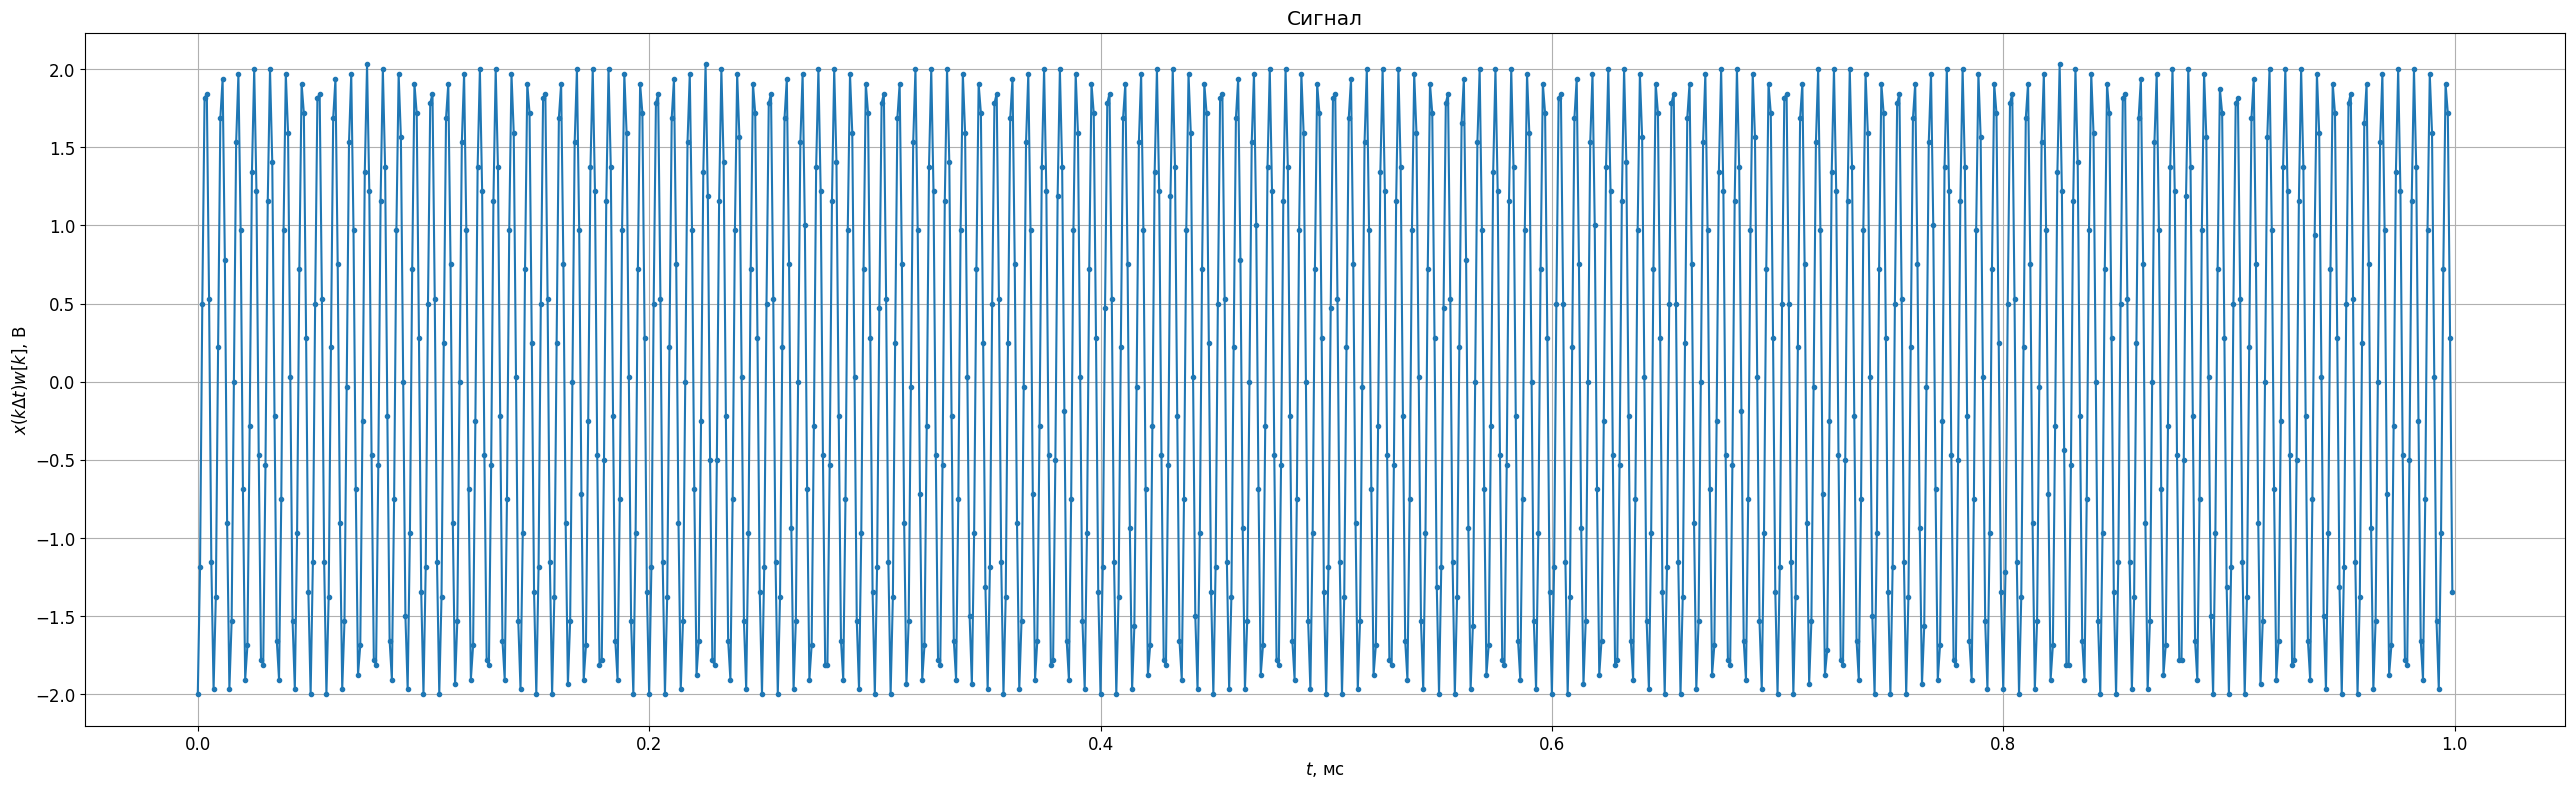

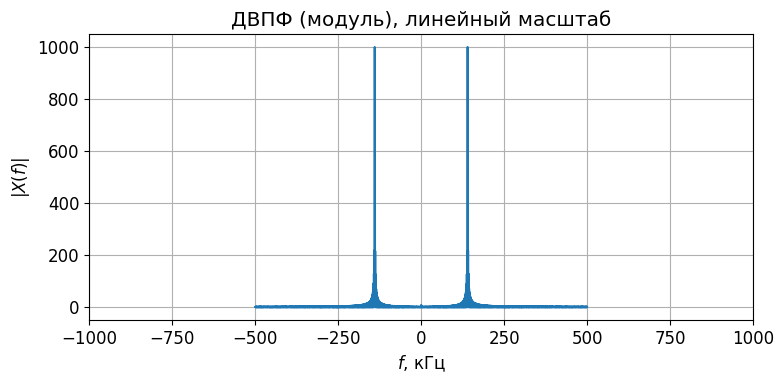

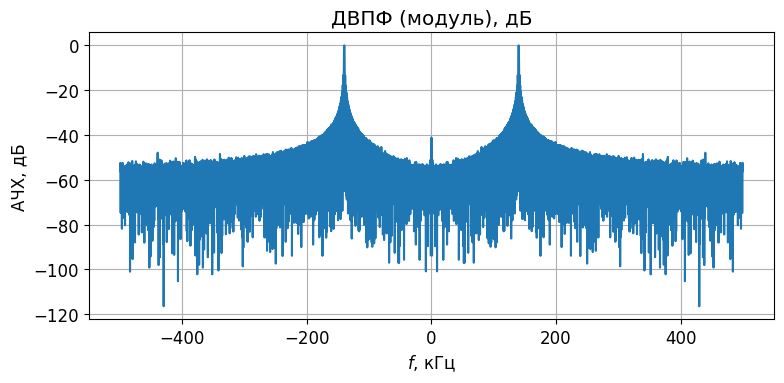

In [3]:
# здесь и далее выполнить подстановку своего имени файла .txt
f_b, Xn_b,  Xn_db_b, t_b, x_b = analyse(file='data/sin140k_box.txt', const_level=0, window='boxcar')

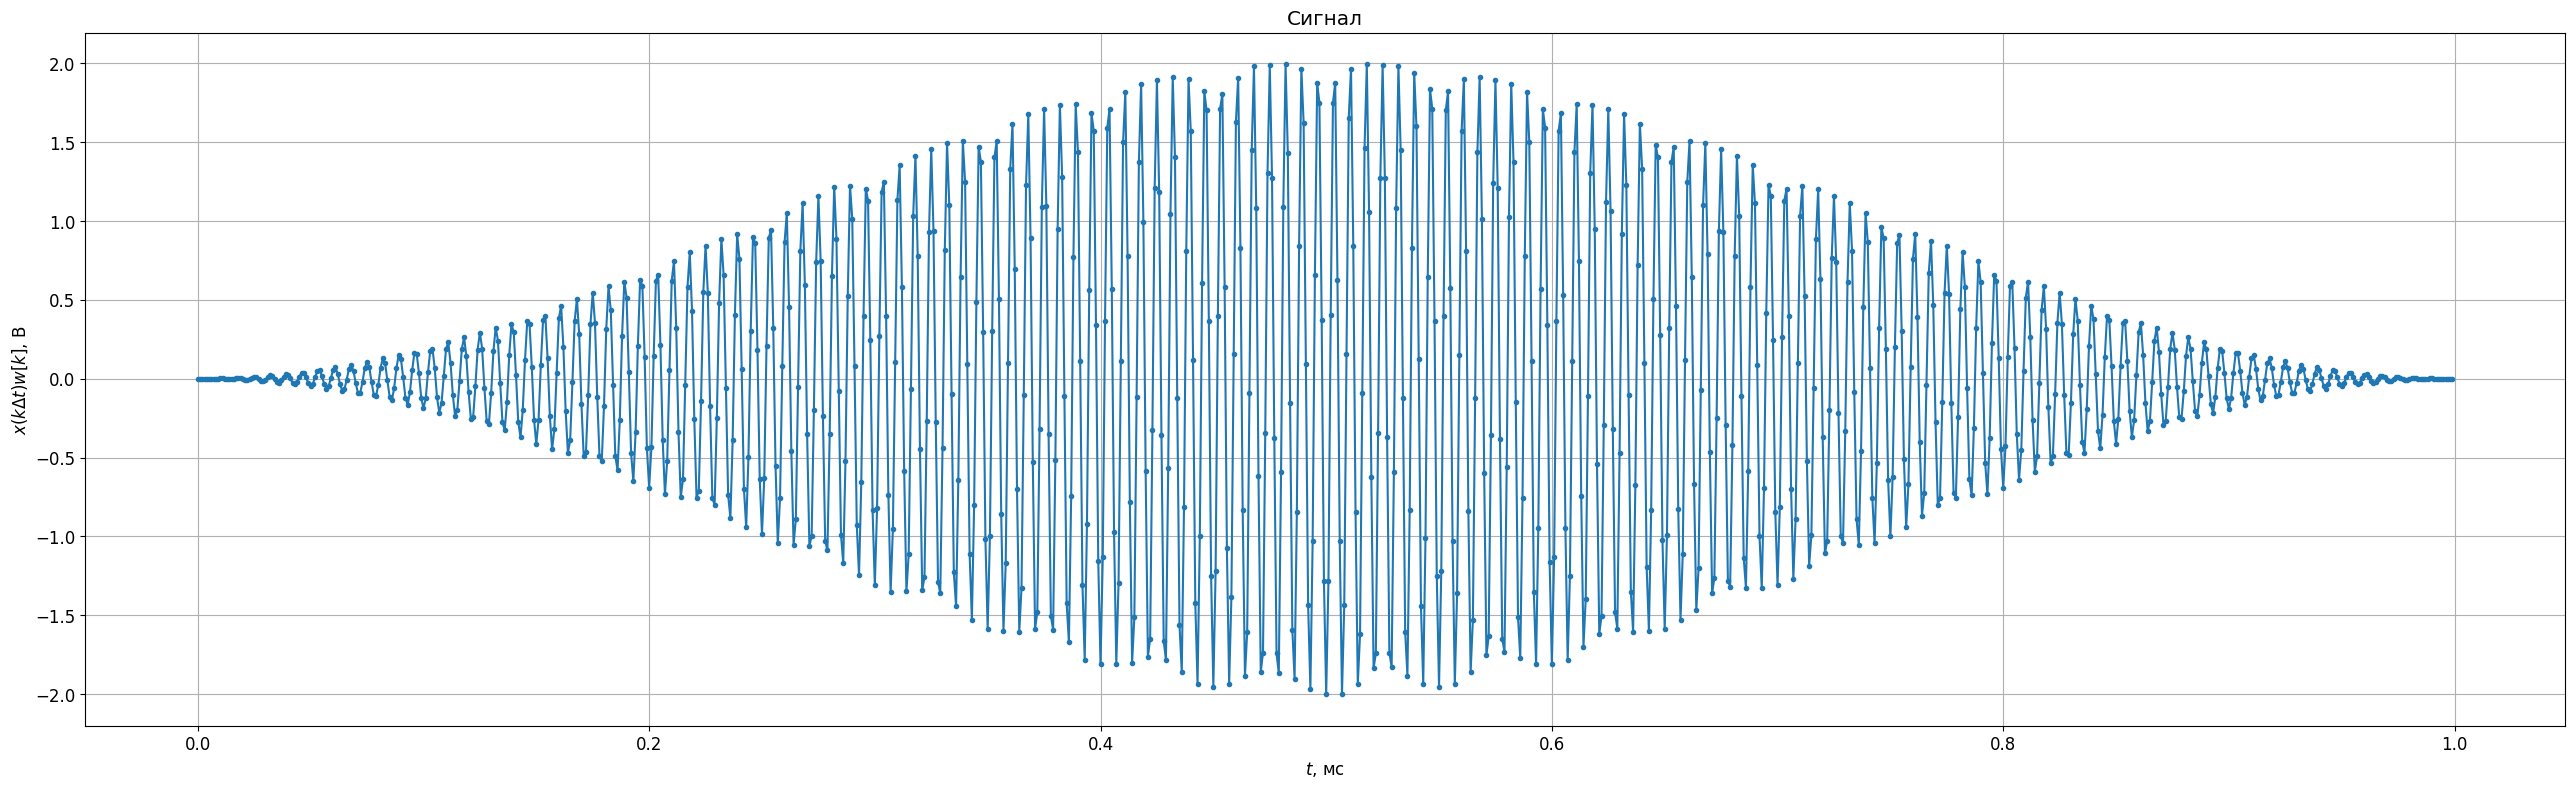

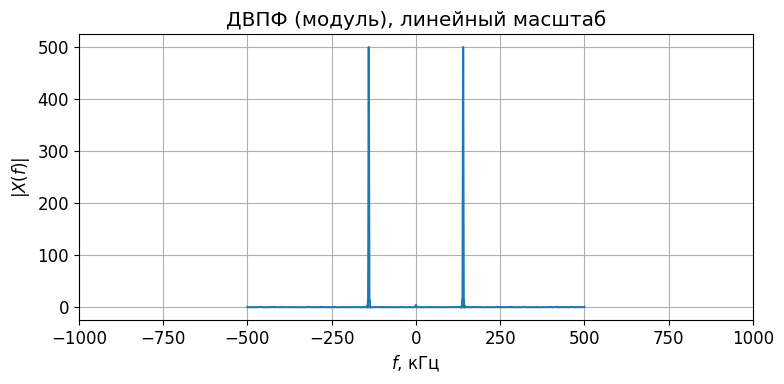

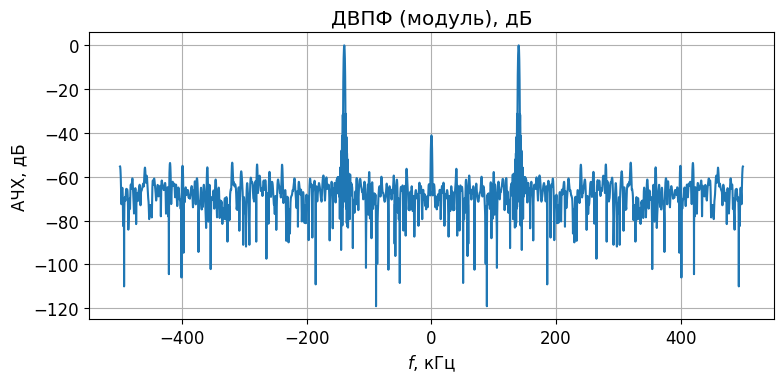

In [4]:
f_h, Xn_h, Xn_db_h, t_h, x_h = analyse(file='data/sin140k_hanna.txt', const_level=0, window='hann')

Частота максимума в спектре:

In [5]:
size_b = len(Xn_b)
f_b_0 = (np.abs(f_b[Xn_b[:size_b//2].argmax()]) + f_b[Xn_b[size_b//2:].argmax() + size_b//2])/2
df.loc["частота максимума в спектре", "прямоугольное окно"] = f'{f_b_0:.2f} кГц'
size_h = len(Xn_h)
f_h_0 = (np.abs(f_h[Xn_h[:size_h//2].argmax()]) + f_h[Xn_h[size_h//2:].argmax() + size_h//2])/2
df.loc["частота максимума в спектре", "окно Ханна"] = f'{f_h_0:.2f} кГц'
df.loc["частота максимума в спектре"]

прямоугольное окно    140.00 кГц
окно Ханна            140.00 кГц
Name: частота максимума в спектре, dtype: object

Ширина главного лепестка на нулевом уровне:

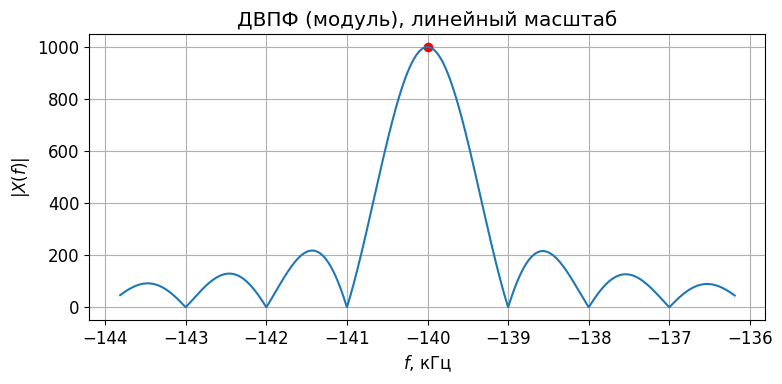

In [6]:
figsize=[8, 4]
ind = Xn_b[:size_b//2].argmax()
w = 1000

plt.figure(figsize=figsize)
plt.title("ДВПФ (модуль), линейный масштаб")
plt.plot(-f_b_0, Xn_b[:size_b//2].max(), 'ro')
plt.plot(f_b[ind - w:ind + w], Xn_b[ind - w:ind + w])
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()
plt.show()

df.loc["ширина главного лепестка на нулевом уровне", "прямоугольное окно"] = '2 кГц'

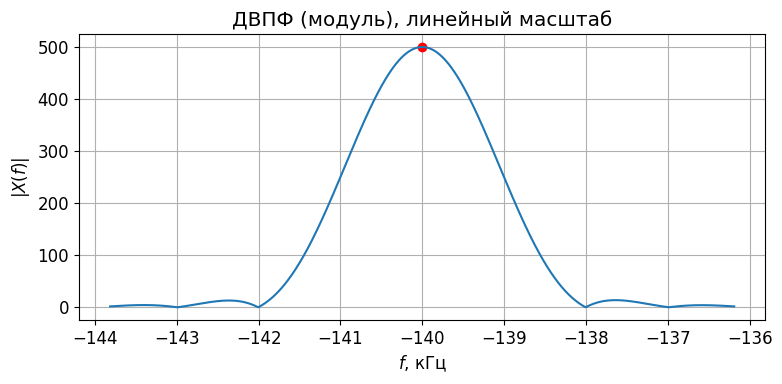

In [7]:
figsize=[8, 4]
ind = Xn_h[:size_h//2].argmax()
w = 1000

plt.figure(figsize=figsize)
plt.title("ДВПФ (модуль), линейный масштаб")
plt.plot(-f_h_0, Xn_h[:size_h//2].max(), 'ro')
plt.plot(f_h[ind - w:ind + w], Xn_h[ind - w:ind + w])
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()
plt.show()

df.loc["ширина главного лепестка на нулевом уровне", "окно Ханна"] = '4 кГц'

Ширина главного лепестка на уровне -3дБ	

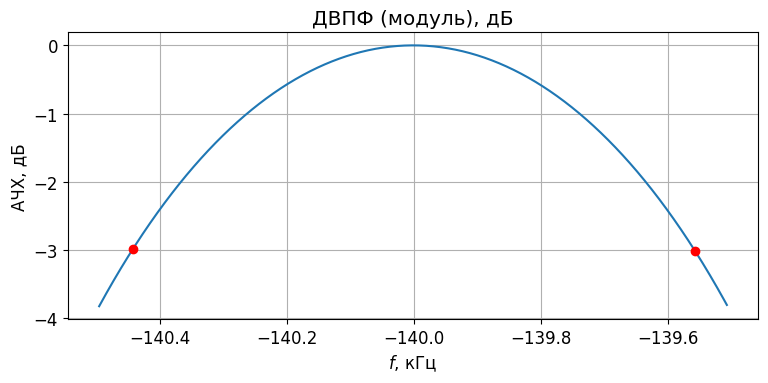

In [8]:
plt.figure(figsize=figsize)
ind = Xn_db_b[:size_b//2].argmax()
w = 130
f_b_zoom, Xn_db_b_zoom = f_b[ind - w:ind + w], Xn_db_b[ind - w:ind + w]
ind_1, ind_2 = np.where(np.abs(Xn_db_b_zoom + 3) < 0.03)[0]
plt.title("ДВПФ (модуль), дБ")
plt.plot(f_b_zoom, Xn_db_b_zoom)
plt.plot(f_b_zoom[ind_1], Xn_db_b_zoom[ind_1], 'ro')
plt.plot(f_b_zoom[ind_2], Xn_db_b_zoom[ind_2], 'ro')
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("АЧХ, дБ")
plt.tight_layout()
plt.show()

df.loc["ширина главного лепестка на уровне -3дБ", "прямоугольное окно"] = f'{f_b_zoom[ind_2] - f_b_zoom[ind_1]:.3f} кГц'


In [9]:
plt.figure(figsize=figsize)
ind = Xn_db_h[:size_b//2].argmax()
w = 200
f_h_zoom, Xn_db_h_zoom = f_h[ind - w:ind + w], Xn_db_h[ind - w:ind + w]

ind_1, ind_2 = np.where(np.abs(Xn_db_h_zoom + 3) < 0.03)[0]
plt.title("ДВПФ (модуль), дБ")
plt.plot(f_h_zoom, Xn_db_h_zoom)
plt.plot(f_h_zoom[ind_1], Xn_db_h_zoom[ind_1], 'ro')
plt.plot(f_h_zoom[ind_2], Xn_db_h_zoom[ind_2], 'ro')
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("АЧХ, дБ")
plt.tight_layout()
plt.show()

df.loc["ширина главного лепестка на уровне -3дБ", "окно Ханна"] = f'{f_h_zoom[ind_2] - f_h_zoom[ind_1]:.3f} кГц'


ValueError: too many values to unpack (expected 2)

<Figure size 800x400 with 0 Axes>

Ширина главного лепестка на уровне -6дБ

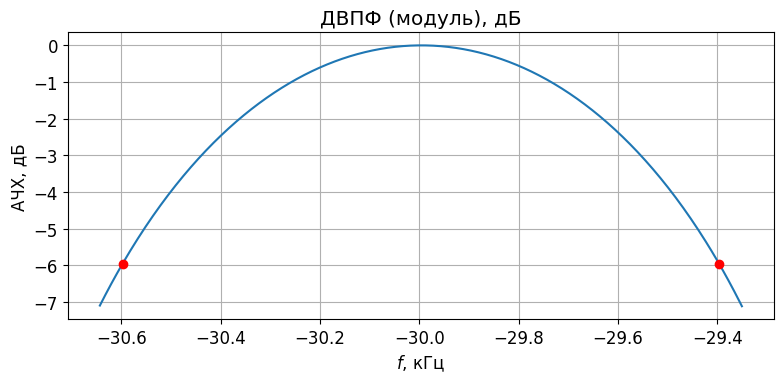

In [ ]:
plt.figure(figsize=figsize)
ind = Xn_db_b[:size_b//2].argmax()
w = 170
f_b_zoom, Xn_db_b_zoom = f_b[ind - w:ind + w], Xn_db_b[ind - w:ind + w]

ind_1, ind_2 = np.where(np.abs(Xn_db_b_zoom + 6) < 0.045)[0]
plt.title("ДВПФ (модуль), дБ")
plt.plot(f_b_zoom, Xn_db_b_zoom)
plt.plot(f_b_zoom[ind_1], Xn_db_b_zoom[ind_1], 'ro')
plt.plot(f_b_zoom[ind_2], Xn_db_b_zoom[ind_2], 'ro')
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("АЧХ, дБ")
plt.tight_layout()
plt.show()

df.loc["ширина главного лепестка на уровне -6дБ", "прямоугольное окно"] = f'{f_b_zoom[ind_2] - f_b_zoom[ind_1]:.3f} кГц'


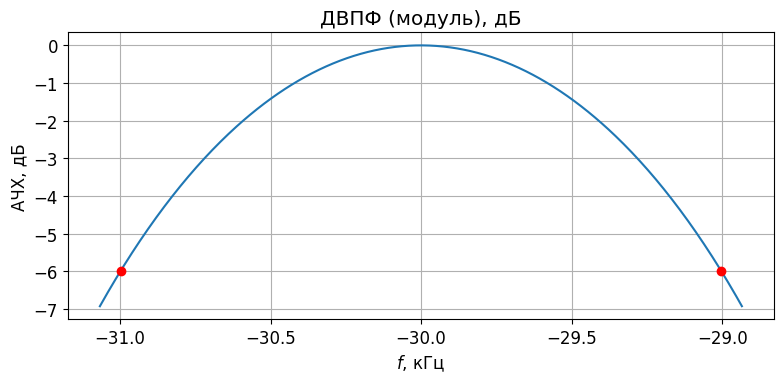

In [ ]:
plt.figure(figsize=figsize)
ind = Xn_db_h[:size_b//2].argmax()
w = 280
f_h_zoom, Xn_db_h_zoom = f_h[ind - w:ind + w], Xn_db_h[ind - w:ind + w]

ind_1, ind_2 = np.where(np.abs(Xn_db_h_zoom + 6) < 0.03)[0]
plt.title("ДВПФ (модуль), дБ")
plt.plot(f_h_zoom, Xn_db_h_zoom)
plt.plot(f_h_zoom[ind_1], Xn_db_h_zoom[ind_1], 'ro')
plt.plot(f_h_zoom[ind_2], Xn_db_h_zoom[ind_2], 'ro')
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("АЧХ, дБ")
plt.tight_layout()
plt.show()

df.loc["ширина главного лепестка на уровне -6дБ", "окно Ханна"] = f'{f_h_zoom[ind_2] - f_h_zoom[ind_1]:.3f} кГц'


Уровень максимального бокового лепестка	

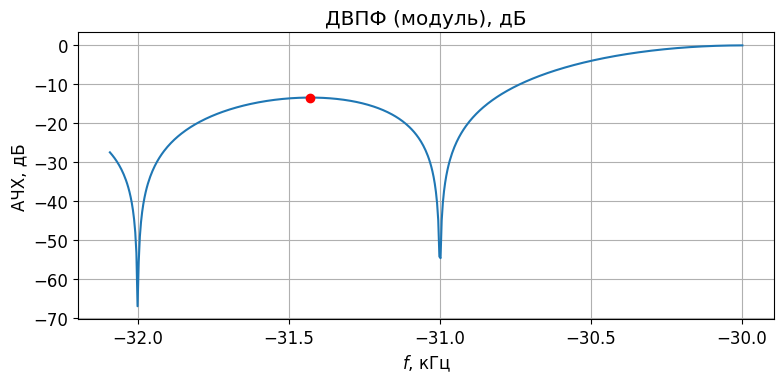

In [ ]:
plt.figure(figsize=figsize)
ind = Xn_db_b[:size_b//2].argmax()
w = 550
f_b_zoom, Xn_db_b_zoom = f_b[ind - w:ind], Xn_db_b[ind - w:ind]
size_zoomed = len(Xn_db_b_zoom)
f_b_zoom_bok, Xn_db_b_zoom_bok = f_b_zoom[:size_zoomed//2], Xn_db_b_zoom[:size_zoomed//2]
ind_max_1 = Xn_db_b_zoom_bok.argmax()

plt.title("ДВПФ (модуль), дБ")
plt.plot(f_b_zoom, Xn_db_b_zoom)
plt.plot(f_b_zoom_bok[ind_max_1], Xn_db_b_zoom_bok[ind_max_1], 'ro')
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("АЧХ, дБ")
plt.tight_layout()
plt.show()
df.loc["уровень максимального бокового лепестка", "прямоугольное окно"] = f'{Xn_db_b_zoom_bok[ind_max_1]:.2f} дБ'


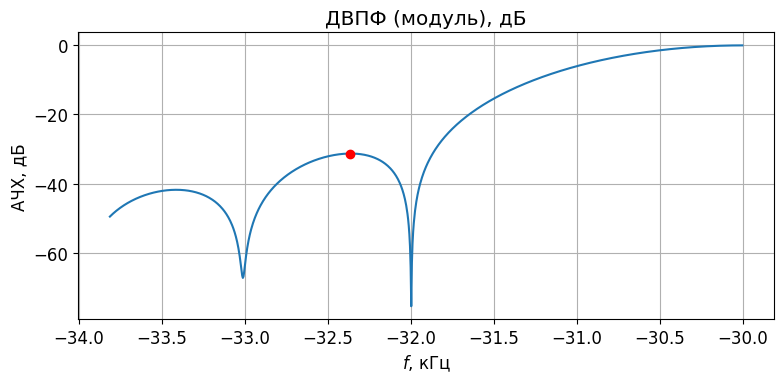

In [ ]:
plt.figure(figsize=figsize)
ind = Xn_db_h[:size_b//2].argmax()
w = 1000
f_h_zoom, Xn_db_h_zoom = f_h[ind - w:ind], Xn_db_h[ind - w:ind]
size_zoomed = len(Xn_db_h_zoom)
f_h_zoom_bok, Xn_db_h_zoom_bok = f_h_zoom[:size_zoomed//2], Xn_db_h_zoom[:size_zoomed//2]
ind_max_1 = Xn_db_h_zoom_bok.argmax()

plt.title("ДВПФ (модуль), дБ")
plt.plot(f_h_zoom, Xn_db_h_zoom)
plt.plot(f_h_zoom_bok[ind_max_1], Xn_db_h_zoom_bok[ind_max_1], 'ro')
plt.grid()
plt.xlabel("$f$, кГц")
plt.ylabel("АЧХ, дБ")
plt.tight_layout()
plt.show()

df.loc["уровень максимального бокового лепестка", "окно Ханна"] = f'{Xn_db_h_zoom_bok[ind_max_1]:.2f} дБ'

Относительный уровень шумов квантования

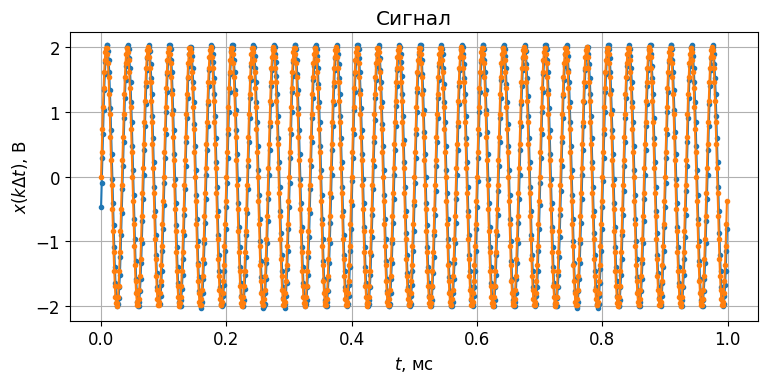

SNR квантования: 25.39 дБ, Теория: 46.40388671568018 дБ


In [ ]:
def compute_snr(x, x_q):
    e = x - x_q

    sigma_x = np.mean(x_q**2) - np.mean(x_q)**2
    sigma_e = np.mean(e**2) - np.mean(e)**2
    
    SNR = 20 * np.log10(sigma_x / sigma_e)
    return SNR

# Пример использования:
x_0 = 2 * np.sin(2 * np.pi * t_b * 30)  

plt.figure(figsize=figsize)
plt.plot(t_b, x_b, '.-')
plt.plot(t_b, x_0, '.-')
plt.title("Сигнал")
plt.xlabel("$t$, мc")
plt.ylabel("$x(k\\Delta t)$, В")
plt.grid()
plt.tight_layout()
plt.show()

snr_value = compute_snr(x_0, x_b)
print(f"SNR квантования: {snr_value:.2f} дБ, Теория: {20 * np.log10(2 ** 8) + 20 * np.log10(np.sqrt(2 / 3))} дБ")

df.loc["относительный уровень шумов квантования", ["прямоугольное окно", "окно Ханна"]] = f'{snr_value:.2f} дБ'

In [ ]:
df

,прямоугольное окно,окно Ханна
частота максимума в спектре,29.99 кГц,30.00 кГц
ширина главного лепестка на нулевом уровне,2 кГц,4 кГц
ширина главного лепестка на уровне -3дБ,0.885 кГц,1.438 кГц
ширина главного лепестка на уровне -6дБ,1.202 кГц,1.995 кГц
уровень максимального бокового лепестка,-13.42 дБ,-31.30 дБ
относительный уровень шумов квантования,25.39 дБ,25.39 дБ


## Задание 1.2. Эффект наложения при дискретизации синусоиды.
Установить на генераторе частоту синусоидального сигнала ${{f}_{1}}$ (сигнал $x(t)=A\sin (2\pi {{f}_{1}}t+\varphi )$). Для того же значения частоты дискретизации, что и в задаче 1.1, получить оценку спектра. Определить, совпадает ли положение главного максимума в спектре. Обосновать результат.

|Вариант |1	|2	|3	|4	|5	|6	|7	|8	|9	|10	|11	|12|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$f_1, кГц$ |700|650|750|850|800|625|675|825|725|775|625|700|

In [11]:
import pandas as pd
dict1 = {}
dict1["прямоугольное окно"]= {"частота максимума в спектре":" "}

dict1["окно Ханна"]= {"частота максимума в спектре":" "}
df = pd.DataFrame(dict1)
df

,прямоугольное окно,окно Ханна
частота максимума в спектре,,


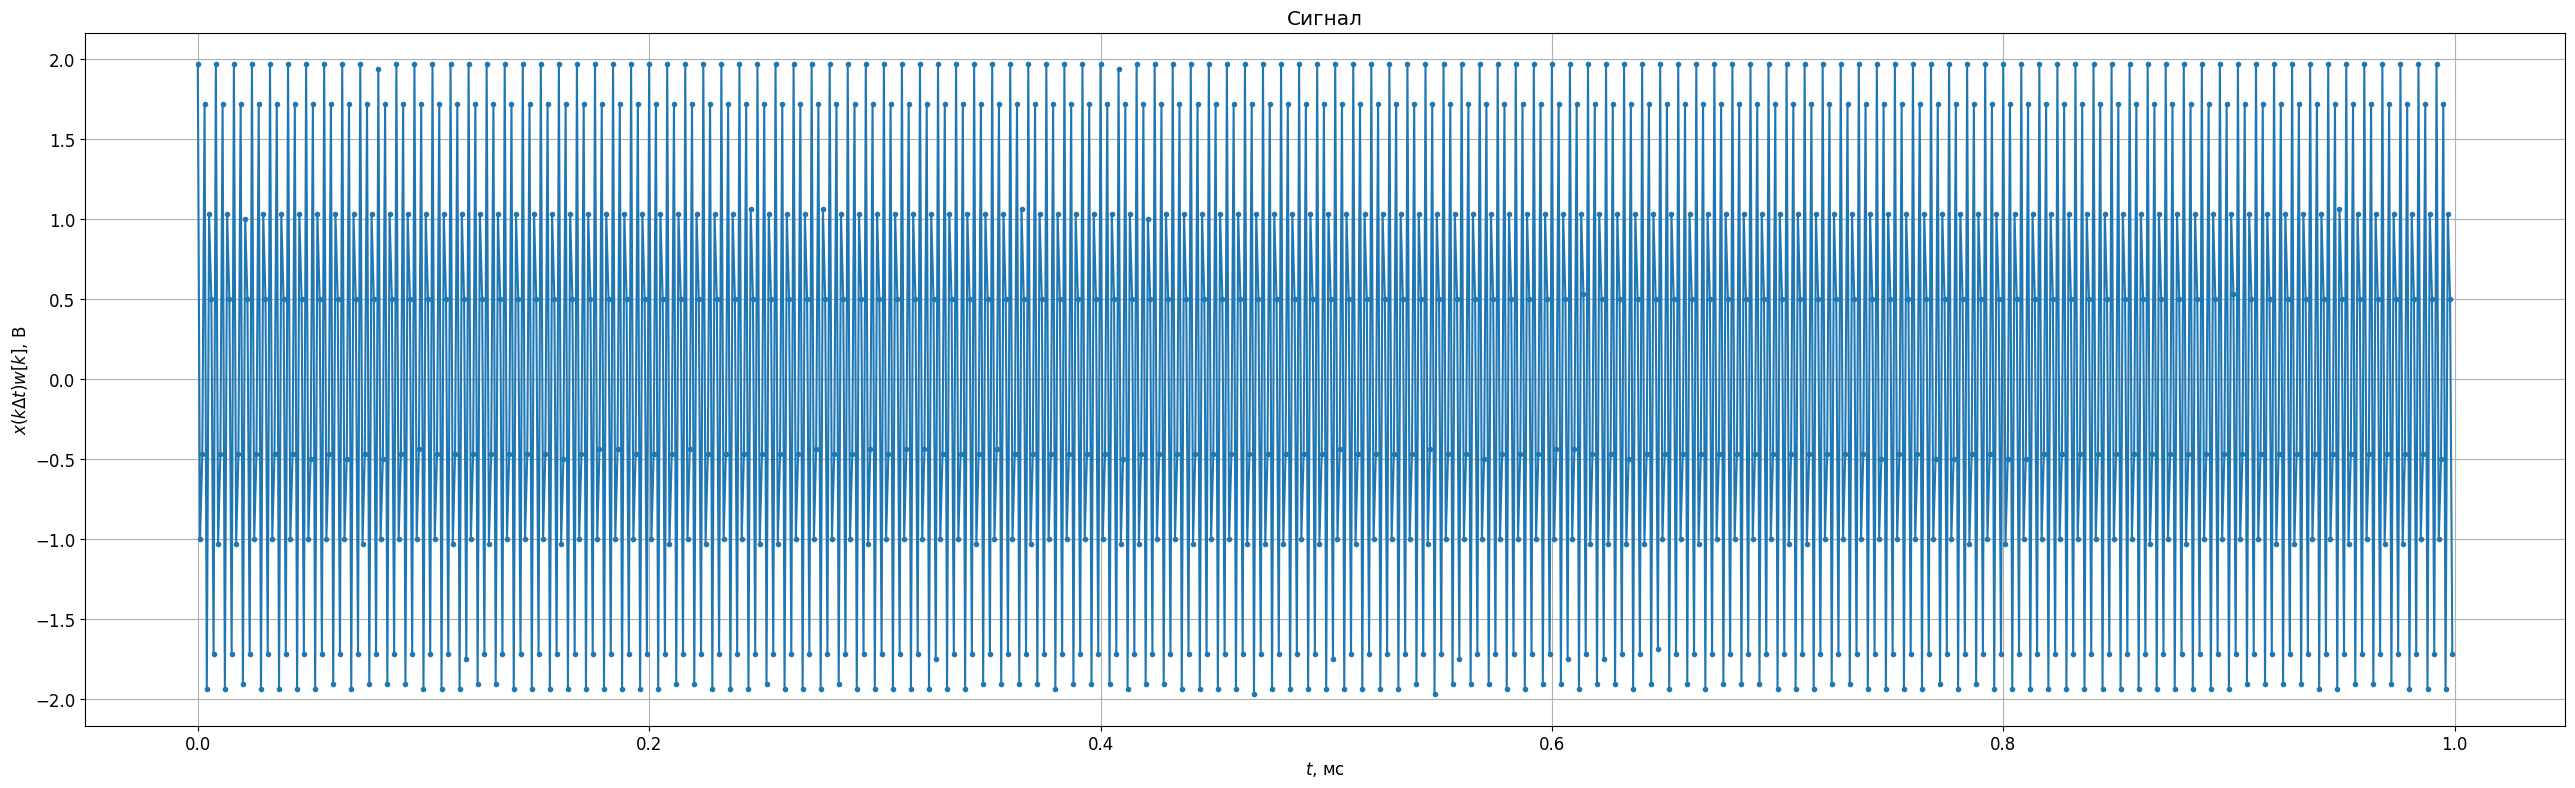

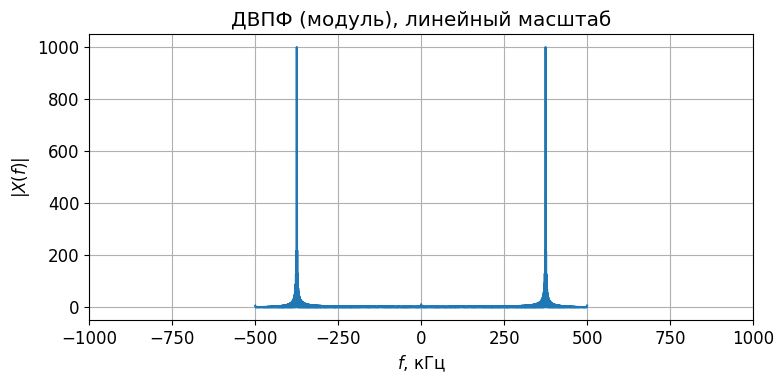

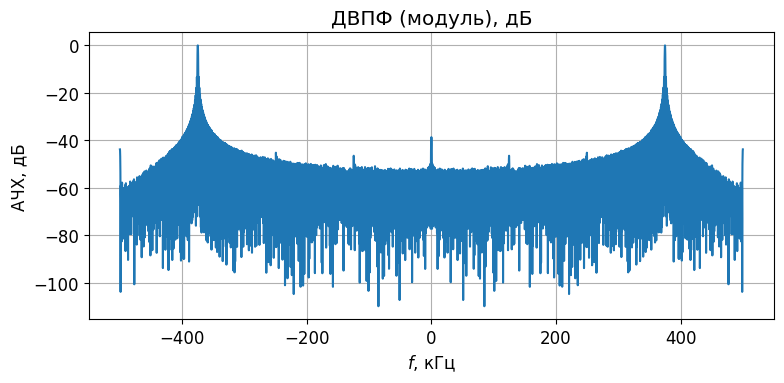

In [16]:
f_b, Xn_b, Xn_db_b, t_b, x_b = analyse(file='data/sin625k.txt', const_level=0, window='boxcar')

In [19]:
size_b = len(Xn_b)
f_b_0 = (np.abs(f_b[Xn_b[:size_b//2].argmax()]) + f_b[Xn_b[size_b//2:].argmax() + size_b//2])/2
df.loc["частота максимума в спектре", "прямоугольное окно"] = f'{f_b_0:.2f} кГц'
size_h = len(Xn_h)
f_h_0 = (np.abs(f_h[Xn_h[:size_h//2].argmax()]) + f_h[Xn_h[size_h//2:].argmax() + size_h//2])/2
df.loc["частота максимума в спектре", "окно Ханна"] = f'{f_b_0:.2f} кГц'
df

,прямоугольное окно,окно Ханна
частота максимума в спектре,375.00 кГц,375.00 кГц


Полученная частота максимума в спектре не совпадает с частотой синусоиды ($f_1 = 625$ кГц). Это явление можно объяснить эффектом наложения спектров (aliasing). Дело в том, что данная частота сигнала не лежит в пределах диапазона, ограниченного половиной частоты дискретизации: $f_1 = 625$ кГц не принадлежит интервалу $[-f_d/2, f_d/2]$.  \
$f_d = 1000$ кГц — частота дискретизации.

Когда частота сигнала превышает половину частоты дискретизации, она «отражается» от этого предела и переносится на более низкие частоты, искажая исходный спектр. В данном случае это и произошло: частота $f_1$ отразилась относительно $\frac{f_d}{2}$. Можно рассчитать новую частоту как разницу между $\frac{f_d}{2}$ и отклонением $f_1$ от этой частоты:

$$
\frac{f_d}{2} - \left(f_1 - \frac{f_d}{2}\right) = 500 \, \text{кГц} - (625 \, \text{кГц} - 500 \, \text{кГц}) = 500 \, \text{кГц} - 125 \, \text{кГц} = 375 \, \text{кГц}.
$$

Таким образом, в спектре появляется максимум на частоте 375 кГц вместо ожидаемых 625 кГц из-за наложения спектров.


## Задание 1.3. Спектр последовательности прямоугольных импульсов. 
На генераторе установить сигнал в виде последовательности импульсов с длительностью $\tau $ и периодом следования $T$ (раздел «Импульсы»). Установить в управляющей программе осциллографа число выборок $N=1000$, размерность ДПФ  ${{N}_{\text{FFT}}}=8192$. Выбрать временной диапазон так, чтобы частота дискретизации была равна ${{f}_{\text{д}}}=20\ \text{МГц}$, а на осциллограмме наблюдалось несколько импульсов (примерный диапазон 5 uS). Рекомендуется использовать режим открытого входа осциллографа. 


|Вариант |1	|2	|3	|4	|5	|6	|7	|8	|9	|10	|11	|12|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$\tau $, мкс |1,5|	2|	2,5|	3|	3,5|	1|	1,5|	2|	1|	1,5|	3|	2|
|$T$, мкс|10|10|10|10|10|8|8|8|8|9|9|9|

Произвести обработку данных на Python. Рекомендуемая размерность ДПФ для обработки в Python ${{N}_{\text{FFT}}}={{2}^{18}}$. Построить графики спектра дискретизованного сигнала (ДВПФ) для случая прямоугольного окна. Сравнить АЧХ сигнала в линейном масштабе с теоретическим результатом. 

** Получить график АЧХ в линейном масштабе для инвертированной последовательности (с длительностью $T-\tau $). Сравнить результаты. 


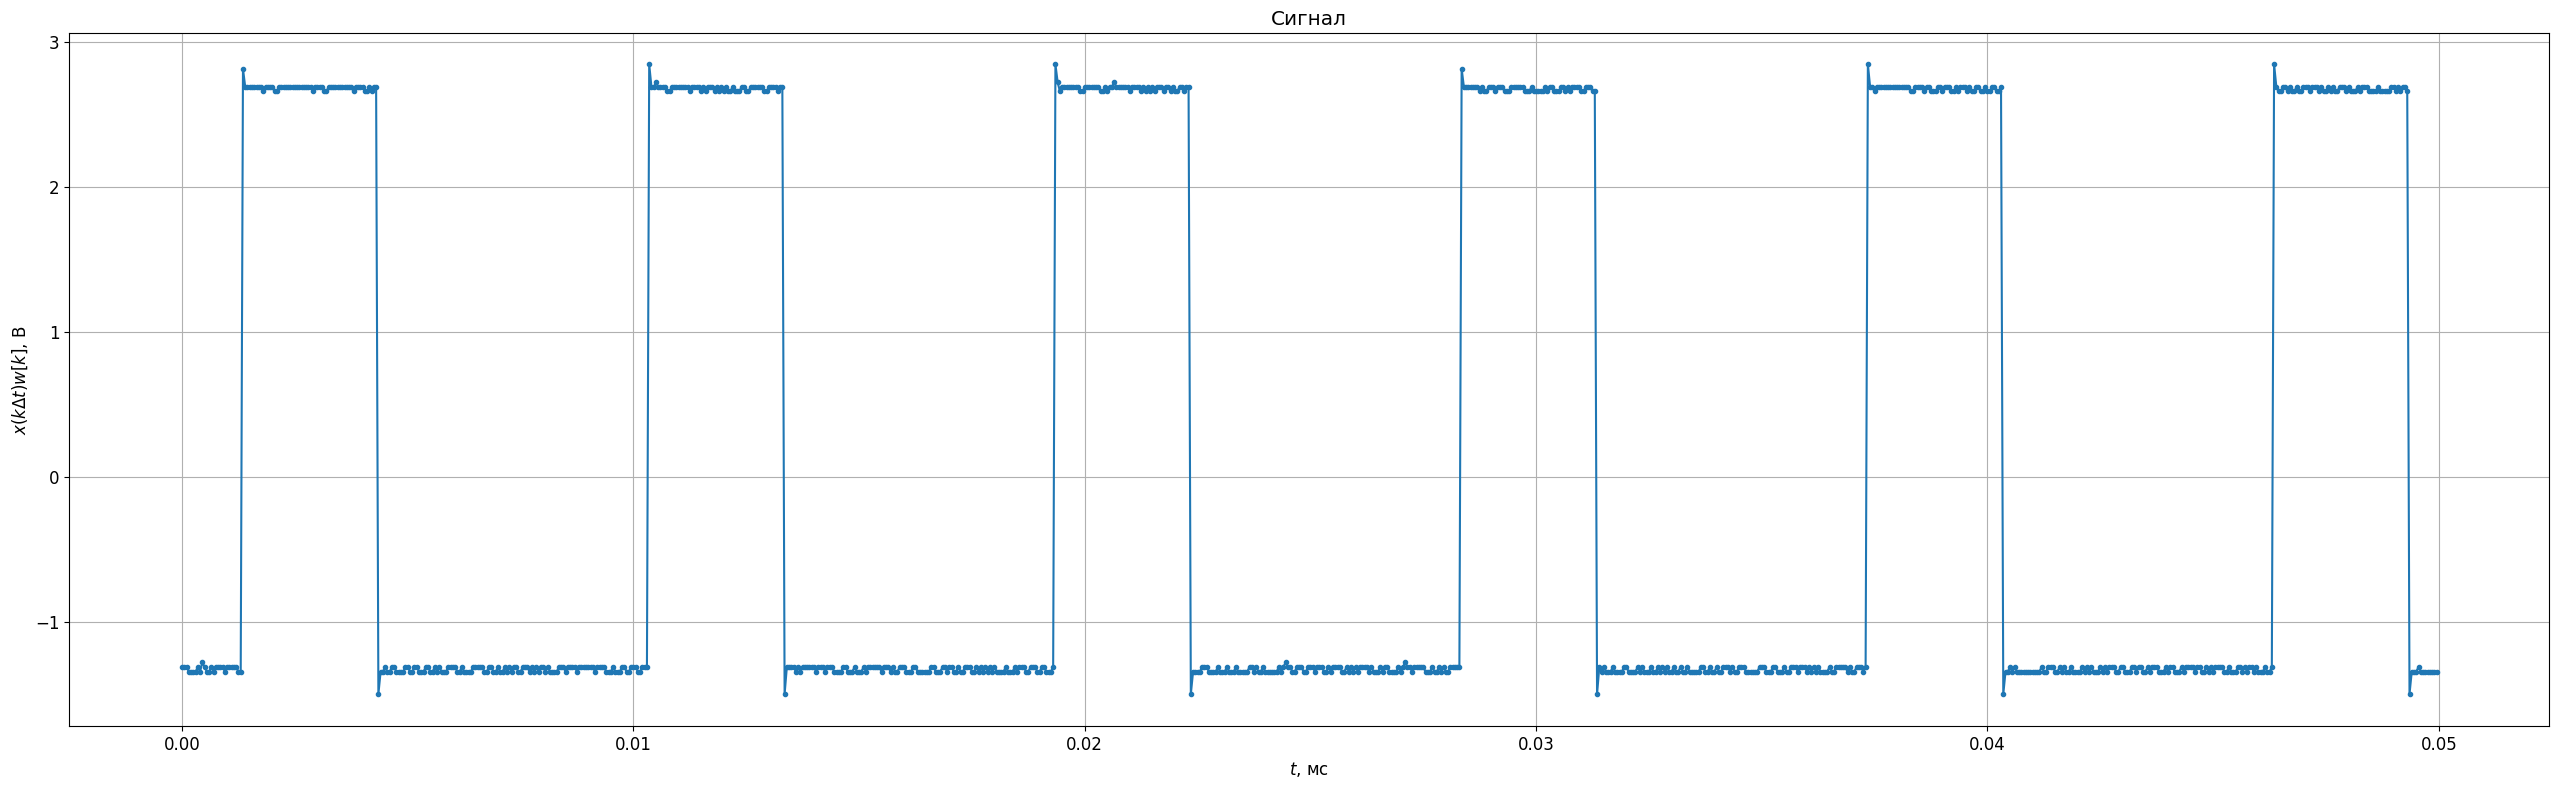

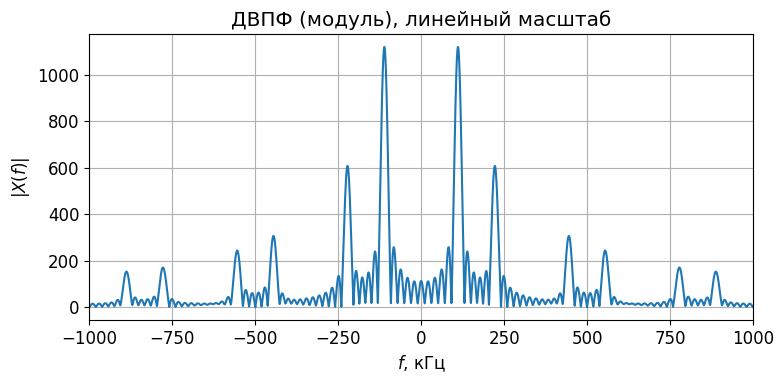

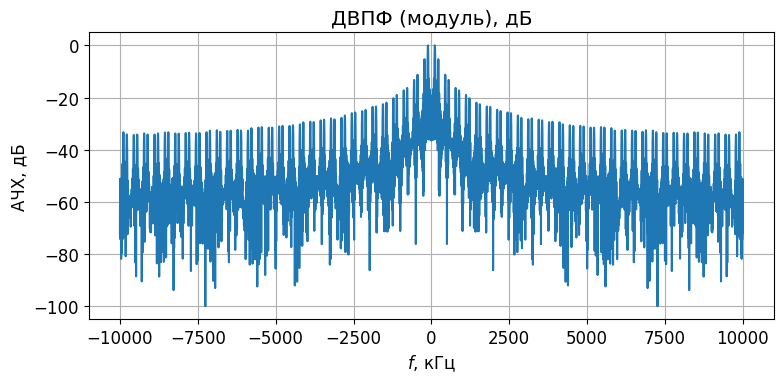

1119.9185434460599


In [21]:
_, X, _, _, _, =analyse(file='data/meandr_33pwm_box.txt', const_level=0, window='boxcar')
print(X.max())

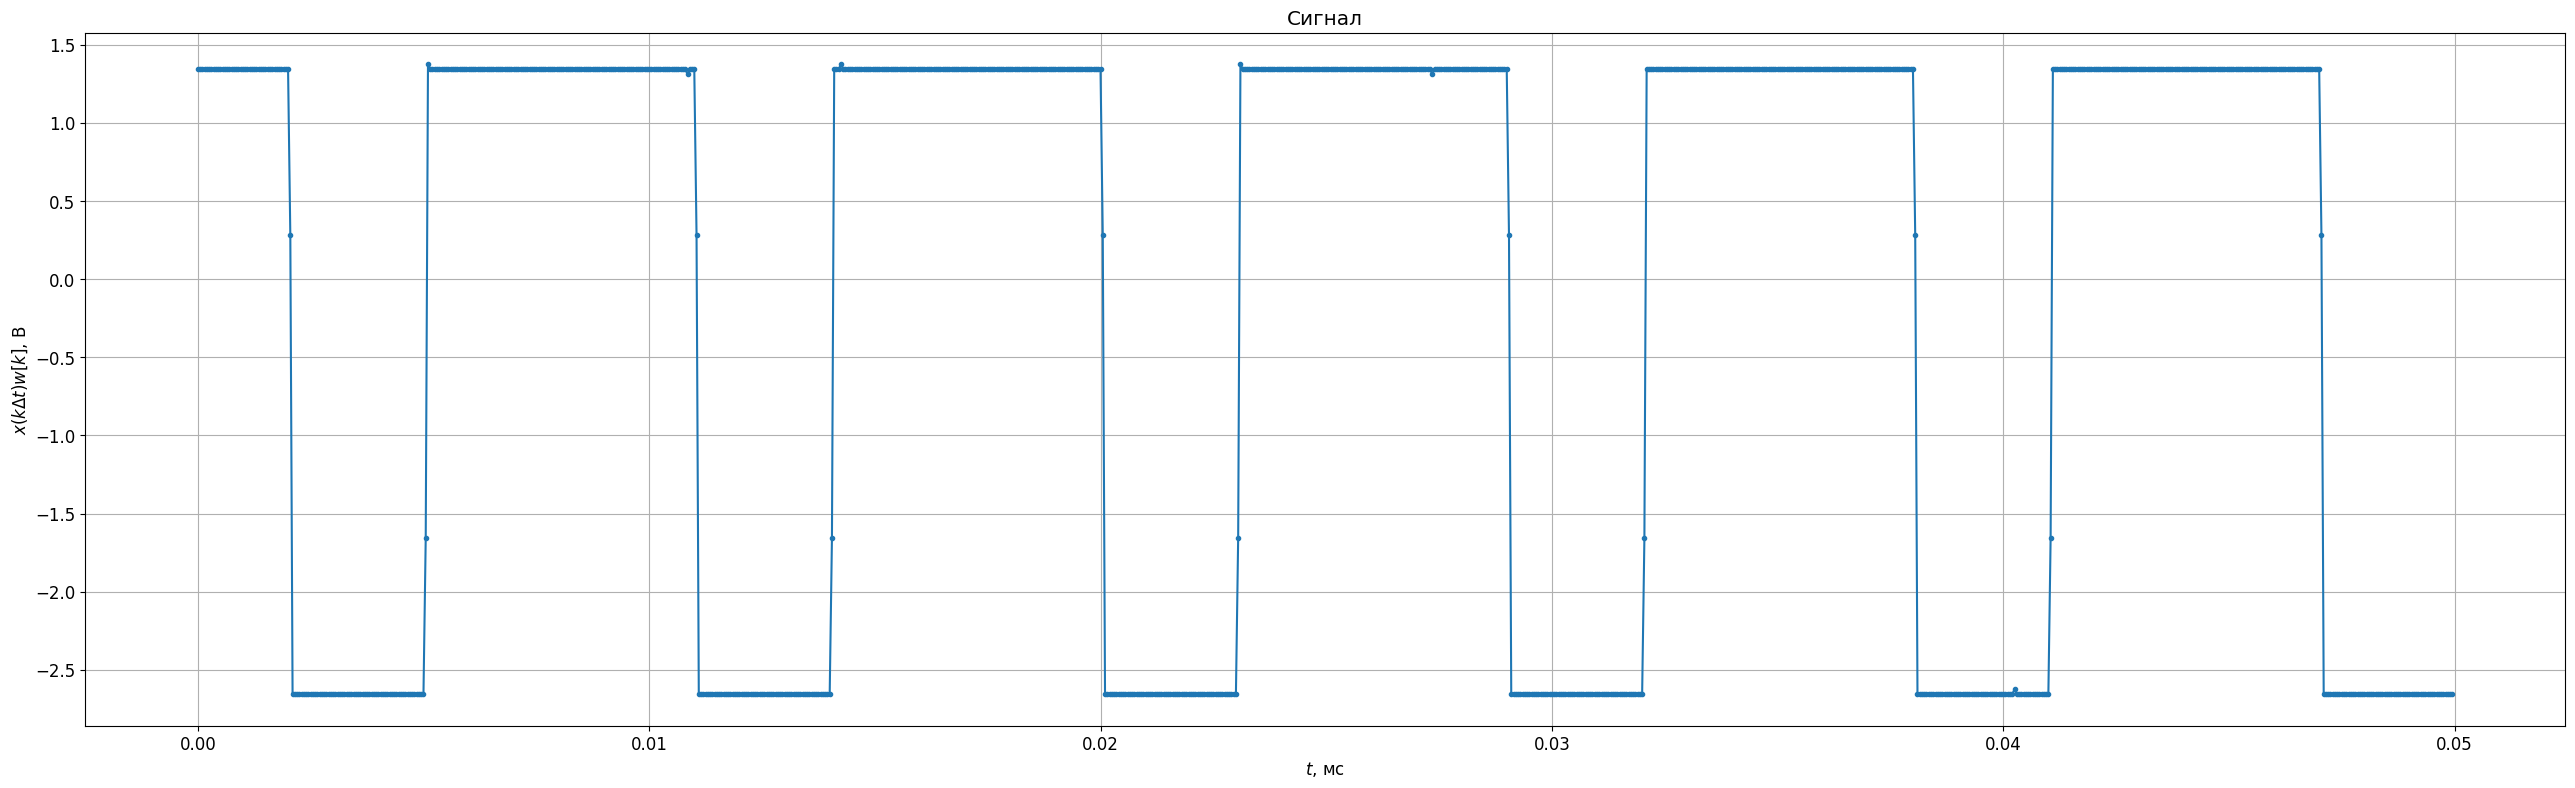

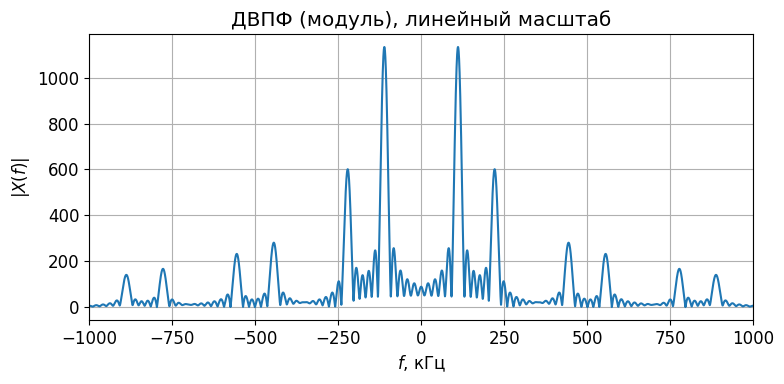

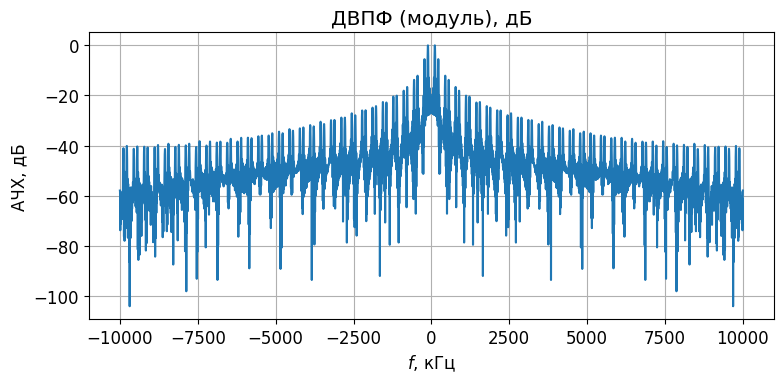

1133.2100955817807


In [22]:
_, X, _, _, _, =analyse(file='data/meandr_66pwm_box.txt', const_level=0, window='boxcar')
print(X.max())

$$|X(f)| = \left| E \cdot \frac{sin(\pi f \tau)}{\pi f} \cdot \frac{sin(\pi f N T)}{sin(\pi f T)}\right|$$
$$|X(f)| = \left| E \cdot \frac{sin(\pi f (T -\tau))}{\pi f} \cdot \frac{sin(\pi f N T)}{sin(\pi f T)}\right|$$


Форма огибающей изменилась, так как поменялся $sin(\pi f \tau)$ на $sin(\pi f (T -\tau)) = sin(\pi f 7\tau))$. \
Значит поменялось как максимальное значение в спектре, так и частота огибающей 

# Модуль 2.

## Задание 2.1. Субдискретизация полосовых радиосигналов
Найти минимальную частоту дискретизации ${{f}_{\text{}}}{{}_{\text{min}}}$ для канала 4 на рисунке. Изобразить спектр сигнала до дискретизации (точка А). Найти и изобразить спектр дискретного сигнала (точка Б).
 

1) С помощью встроенного в цифровой осциллограф генератора сигналов (в режиме синусоидального сигнала со свипированием частоты - ГКЧ) реализовать полосовой сигнал для каналов 0, 4, 5. Найти минимальную частоту дискретизации ${{f}_{\text{д}}}{{}_{\text{min}}}$ для этих каналов. С использованием окна Ханна получить оценку спектра дискретного сигнала для каждого из этих каналов в полосе Найквиста.
2)  Повторить п. 1-2 для частоты дискретизации ${{f}_{\text{д}}}=2{{f}_{\text{}}}{{}_{\text{min}}}.$ Объяснить результат.


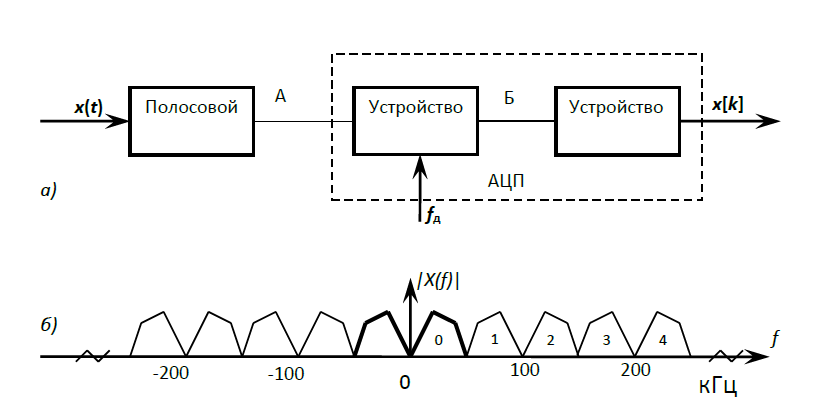

Для канала 4 $f_0 = 225$ кГц, $f_\text{в} = 25$ кГц. Получается, что $f_0 - f_\text{в} = 200 = 4 \cdot 2 f_\text{в}$. 4 - порядок субдискретизации. 

Из-за того, что эта разность кратна $f_\text{в}$, минимальная частота дискретизации равна $f_\text{д min} = f_\text{в} \cdot 4 = 100$ кГц

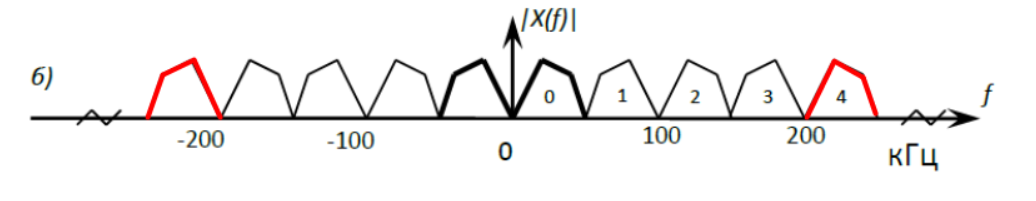

Спектр сигнала до дискретизации будет состоять только из пиков 4 канала, т.к. считаем полосовой фильтр идеальным(его спетр изображен ниже)

Полосовой фильтр

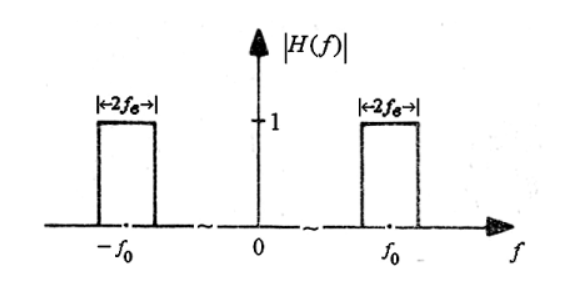

Спектр сигнала до дискретизации

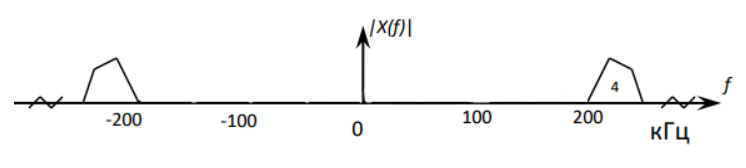

Спектр сигнала в точке Б(т.к. взяли минимальную частоту дискретизации). Порядок субдискретизации как раз показывает количество отражений прямого спектра до нуля

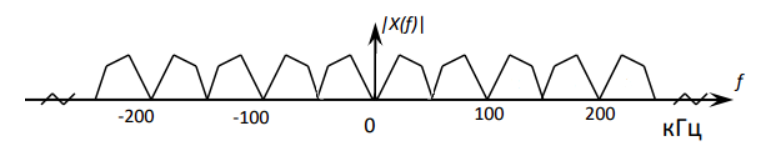

Для канала 0: $f_0 = 25$ кГц, $f_\text{в} = 25$ кГц. Получается, что $f_0 - f_\text{в} = 0 = 0 \cdot 2 f_\text{в}$. 0 - порядок субдискретизации. $f_\text{д min} = f_\text{в} \cdot 4 = 100$ кГц

 Для канала 4: $f_0 = 225$ кГц, $f_\text{в} = 25$ кГц. Получается, что $f_0 - f_\text{в} = 200 = 4 \cdot 2 f_\text{в}$. 4 - порядок субдискретизации. $f_\text{д min} = f_\text{в} \cdot 4 = 100$ кГц

Для канала 5: $f_0 = 275$ кГц, $f_\text{в} = 25$ кГц. Получается, что $f_0 - f_\text{в} = 250 = 5 \cdot 2 f_\text{в}$. 5 - порядок субдискретизации. $f_\text{д min} = f_\text{в} \cdot 4 = 100$ кГц

In [31]:
def analyse_module2(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  
    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
    plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("АЧХ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.xlim([0, fs/2/1e3])
    plt.ylim(bottom=-50)
    plt.tight_layout()
    plt.show()

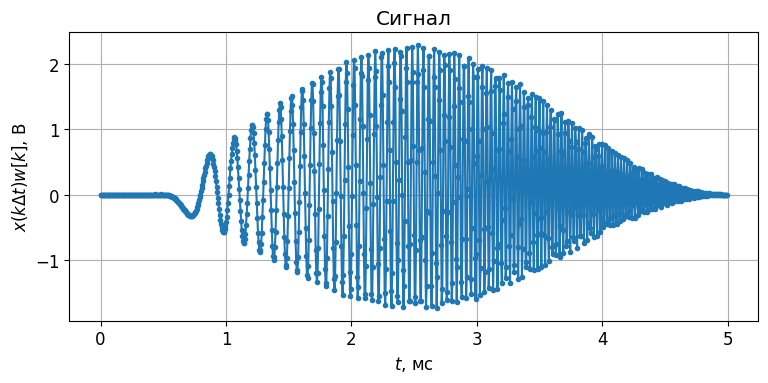

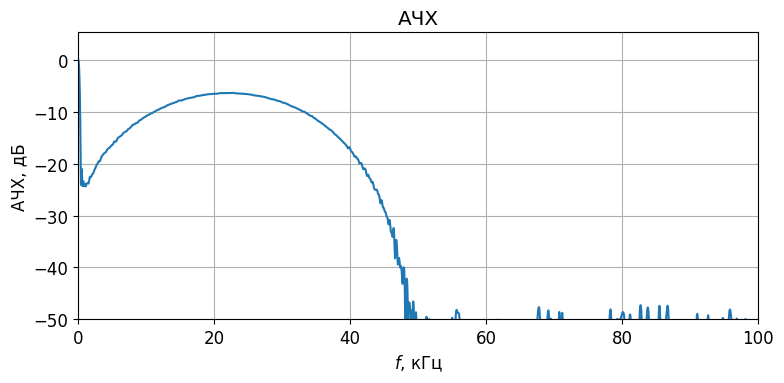

In [32]:
analyse_module2(file='data/0canal 200k.txt', window='hann')

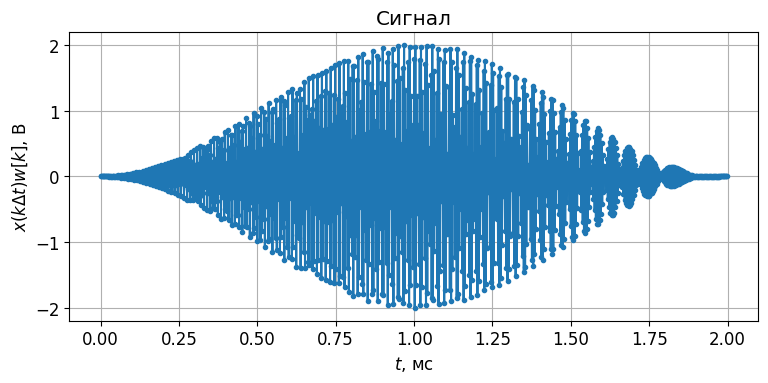

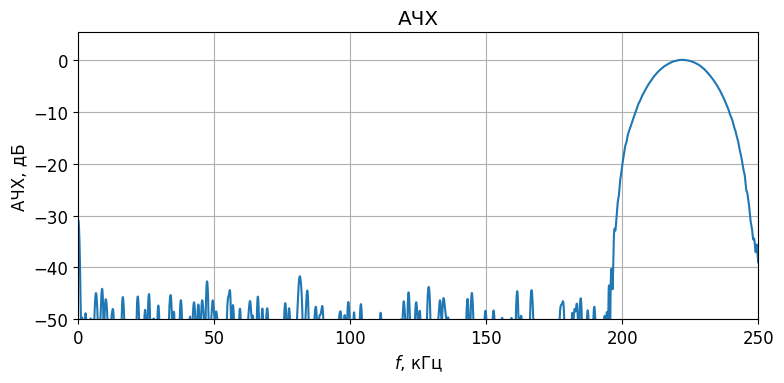

In [33]:
analyse_module2(file='data/4canal 500k.txt', window='hann')

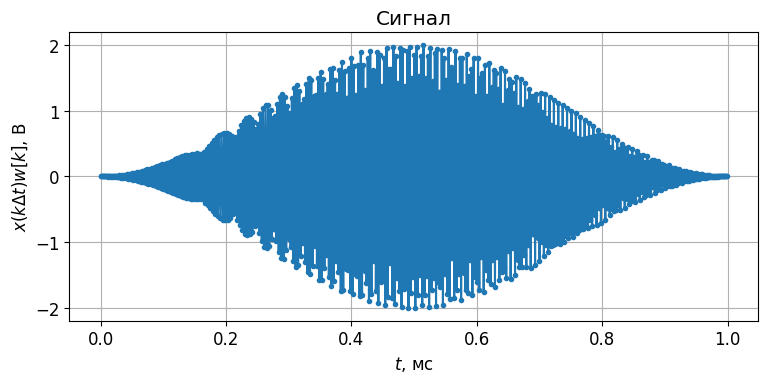

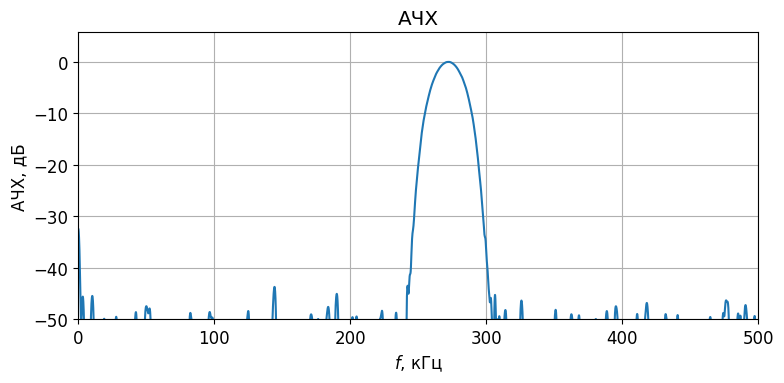

In [35]:
analyse_module2(file='data/5canal 1000k.txt', window='hann')

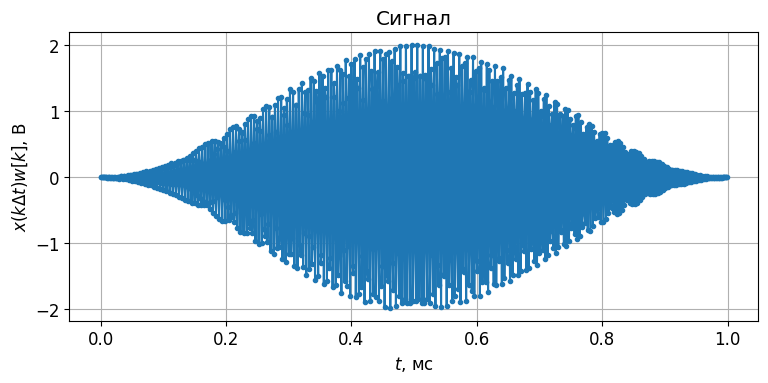

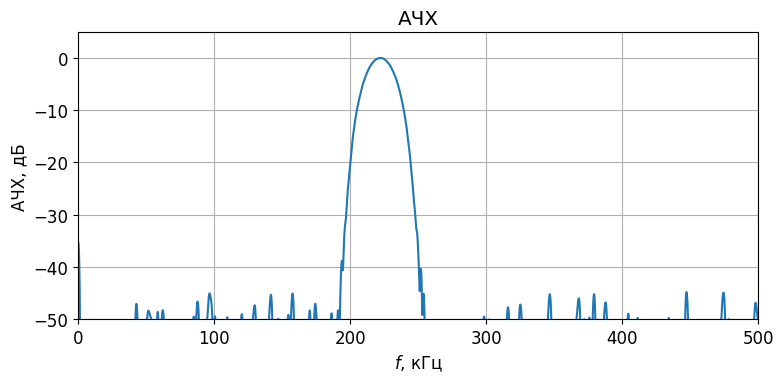

In [36]:
analyse_module2(file='data/4canal 1000k.txt', window='hann')

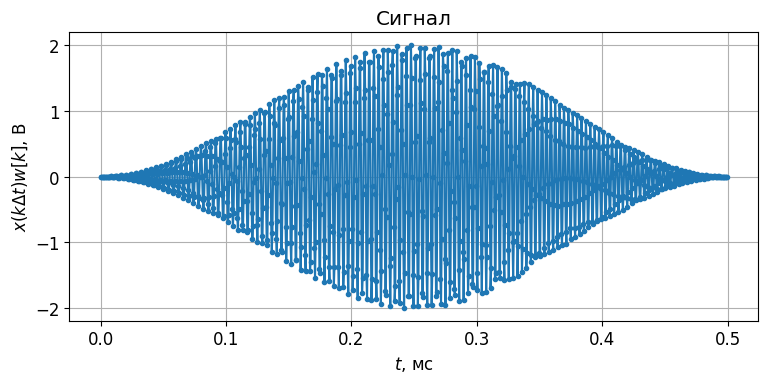

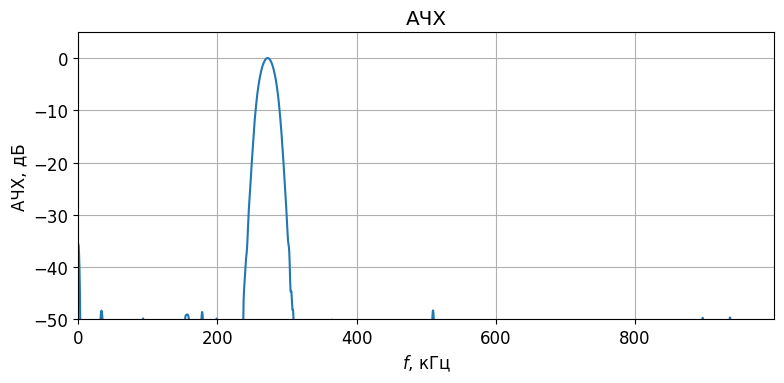

In [37]:
analyse_module2(file='data/5canal 2000k.txt', window='hann')